In [45]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [16]:
ds = sg.load_dataset("../data/Gorilla_gorilla_gorilla")
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (variants: 21463034, samples: 46, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/16)
    call_genotype         (variants, samples, ploidy) int8 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 987MB dask.array<chunksize=(1000, 46), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_filter        (variants, filters) bool 43MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [17]:
missing_rate_inds = ds.call_genotype_mask[:,:,1].sum(axis=0).values/ds.call_genotype_mask[:,:,1].count(axis=0).values
ds = ds.isel(samples=(missing_rate_inds <= 0.1))
ds["sample_cohort"] = xr.DataArray(range(len(ds.samples)), dims="samples")
ds

<xarray.Dataset> Size: 3GB
Dimensions:               (variants: 21463034, samples: 21, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 451MB dask.array<chunksize=(1000, 21), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sample_cohort         (samples) int64 168B 0 1 2 3 4 5 ... 15 16 17 18 19 20
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [18]:
ds.contig_length.values, ds.contig_id.values

(array([2.43847345e+08, 2.15253457e+08, 2.15373162e+08, 1.95332687e+08,
        1.99452338e+08, 1.70803427e+08, 1.58533252e+08, 1.50804130e+08,
        1.47876701e+08, 1.54228409e+08, 1.50248535e+08, 1.45906006e+08,
        1.34695396e+08, 1.32018348e+08, 1.31692671e+08, 1.07915467e+08,
        1.16054869e+08, 1.31347499e+08, 1.20452965e+08, 8.03129280e+07,
        8.44432190e+07, 5.95073140e+07, 5.47697970e+07, 1.77558554e+08,
        6.74057480e+07, 1.64120000e+04]),
 array(['NC_073224.2', 'NC_086017.1', 'NC_073227.2', 'NC_073228.2',
        'NC_073229.2', 'NC_073230.2', 'NC_073231.2', 'NC_073232.2',
        'NC_073233.2', 'NC_073234.2', 'NC_073235.2', 'NC_073236.2',
        'NC_073237.2', 'NC_073238.2', 'NC_073239.2', 'NC_073240.2',
        'NC_073241.2', 'NC_073242.2', 'NC_073243.2', 'NC_073244.2',
        'NC_073245.2', 'NC_073246.2', 'NC_086018.1', 'NC_073247.2',
        'NC_073248.2', 'NC_011120.1'], dtype=object))

In [19]:
#Guess is that last chrom is chrX. Note that there actually also is a contig 24 (Y) and contig 25 (Mitochondria)
pd.Series(ds.variant_contig.values).value_counts()

0     1627541
2     1588843
1     1498730
4     1332382
5     1199257
3     1178356
6     1153274
7     1048980
8     1020183
10     987279
9      973588
11     865730
12     854911
13     791558
18     763742
14     695159
23     666044
16     612986
15     564824
17     555624
20     466439
19     417460
21     328392
22     271752
Name: count, dtype: int64

In [20]:
ds_X = ds.isel(contigs=(23))
ds_X

<xarray.Dataset> Size: 3GB
Dimensions:               (variants: 21463034, samples: 21, ploidy: 2,
                           filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 451MB dask.array<chunksize=(1000, 21), meta=np.ndarray>
    contig_id             object 8B dask.array<chunksize=(), meta=np.ndarray>
    contig_length         float64 8B dask.array<chunksize=(), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sample_cohort         (samples) int64 168B 0 1 2 3 4 5 ... 15 16 17 18 19 20
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [47]:
ds_X.sample_id.values

array(['PD_0180', 'PD_0181', 'PD_0182', 'PD_0183', 'PD_0184', 'PD_0185',
       'PD_0186', 'PD_0188', 'PD_0189', 'PD_0190', 'PD_0191', 'PD_0192',
       'PD_0193', 'PD_0194', 'PD_0195', 'PD_0196', 'PD_0197', 'PD_0198',
       'SAMN01920484', 'SAMN01920485', 'SAMN01920489'], dtype=object)

In [22]:
ds_X.contig_length.values

array(1.77558554e+08)

In [43]:
ds_X.call_genotype[:,20][:20].values

array([[ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 0,  0],
       [-1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0]], dtype=int8)

In [85]:
cov_summaries = glob.glob("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/Gorilla_gorilla_gorilla/cov/*")

In [86]:
df_l = []
for p in cov_summaries:
    print(p.split("/")[-1].split(".")[0])
    df = pd.read_csv(p, sep="\t", names=["Name", "Contig", "start", "end", "length", "?", "coverage"])
    df["ID"] = p.split("/")[-1].split(".")[0]
    df_l.append(df)
df_cov = pd.concat(df_l)

SAMN01920495
PD_0183
PD_0184
SAMN01920492
SAMN01920478
SAMN01920503
SAMN01920483
PD_0195
PD_0192
SAMN01920484
SAMN01920477
SAMN01920479
SAMN01920493
PD_0185
PD_0182
SAMN01920494
SAMN01920485
PD_0193
PD_0194
SAMN01920482
SAMN01920502
PD_0197
SAMN01920481
SAMN01920486
PD_0190
SAMN01920488
SAMN01920501
PD_0188
SAMN01920499
PD_0181
SAMN01920497
SAMN01920490
PD_0186
PD_0198
SAMN01920489
SAMN01920500
PD_0191
SAMN01920487
SAMN01920480
PD_0196
PD_0187
SAMN01920491
SAMN01920496
PD_0180
SAMN01920498
PD_0189


In [87]:
df_cov["Contig_type"] = ["chrX" if x == "postPAR1" else "non-X" for x in df_cov.Name]

<Axes: xlabel='coverage', ylabel='Count'>

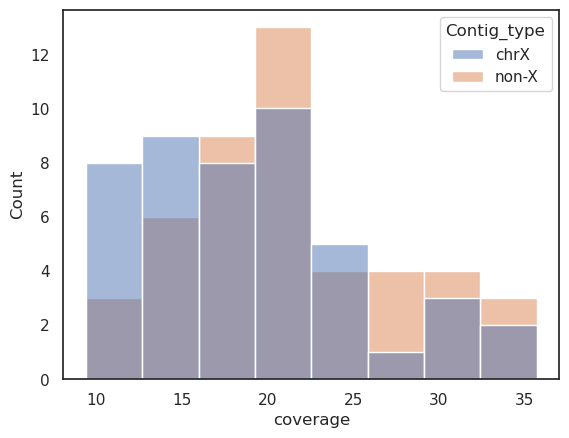

In [88]:
sns.histplot(df_cov.groupby(["ID", "Contig_type"])["coverage"].median().reset_index(), x="coverage", hue="Contig_type")

In [127]:
df_group = df_cov.groupby(["ID", "Contig_type"])["coverage"].median().reset_index()
non_X = df_group.loc[df_group.Contig_type == "non-X"]
df_cov["aut_cov"] = df_cov.ID.map(dict(zip(non_X.ID, non_X.coverage)))
df_cov["relative_cov"] = df_cov.coverage/df_cov.aut_cov

In [123]:
df_cov

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov
0,NC_073224.2,NC_073224.2,1,243847345,239752752,4203819301,17.5340,SAMN01920495,non-X,17.8356,0.791896
1,NC_086017.1,NC_086017.1,1,215253457,212720055,3966143448,18.6449,SAMN01920495,non-X,17.8356,0.842068
2,NC_073227.2,NC_073227.2,1,215373162,210274335,4141899393,19.6976,SAMN01920495,non-X,17.8356,0.997094
3,NC_073228.2,NC_073228.2,1,195332687,192154248,3471288490,18.0651,SAMN01920495,non-X,17.8356,0.914457
4,NC_073229.2,NC_073229.2,1,199452338,194795376,3670749101,18.8441,SAMN01920495,non-X,17.8356,0.966716
...,...,...,...,...,...,...,...,...,...,...,...
23,prePAR1,NC_073247.2,1,9544188,7988532,132634398,16.6031,PD_0189,non-X,21.7746,0.699346
24,PAR1,NC_073247.2,9544189,12039748,2477151,49062503,19.8060,PD_0189,non-X,21.7746,0.718168
25,postPAR1,NC_073247.2,12039749,177558554,164769166,3628451390,22.0214,PD_0189,chrX,21.7746,0.798499
26,NC_073248.2,NC_073248.2,1,67405748,24880918,450950531,18.1244,PD_0189,non-X,21.7746,0.780148


In [128]:
df_cov.loc[df_cov.Contig_type == "chrX"]

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov
25,postPAR1,NC_073247.2,12039749,177558554,163068284,3045337189,18.67520,SAMN01920495,chrX,17.8356,1.047074
25,postPAR1,NC_073247.2,12039749,177558554,164813287,4856860223,29.46890,PD_0183,chrX,29.9337,0.984472
25,postPAR1,NC_073247.2,12039749,177558554,163232980,1854717774,11.36240,PD_0184,chrX,21.2220,0.535407
25,postPAR1,NC_073247.2,12039749,177558554,162806342,2875447802,17.66180,SAMN01920492,chrX,16.9038,1.044842
25,postPAR1,NC_073247.2,12039749,177558554,164331886,2838529475,17.27320,SAMN01920478,chrX,16.9586,1.018551
25,postPAR1,NC_073247.2,12039749,177558554,163319375,2217565736,13.57810,SAMN01920503,chrX,13.2428,1.025319
25,postPAR1,NC_073247.2,12039749,177558554,163842809,3255732036,19.87110,SAMN01920483,chrX,20.4510,0.971644
25,postPAR1,NC_073247.2,12039749,177558554,163115793,3337675186,20.46200,PD_0195,chrX,20.9575,0.976357
25,postPAR1,NC_073247.2,12039749,177558554,163097791,2405703129,14.75010,PD_0192,chrX,27.5785,0.534841
25,postPAR1,NC_073247.2,12039749,177558554,163600948,4154854609,25.39630,SAMN01920484,chrX,26.1234,0.972167


<Axes: xlabel='relative_cov', ylabel='Count'>

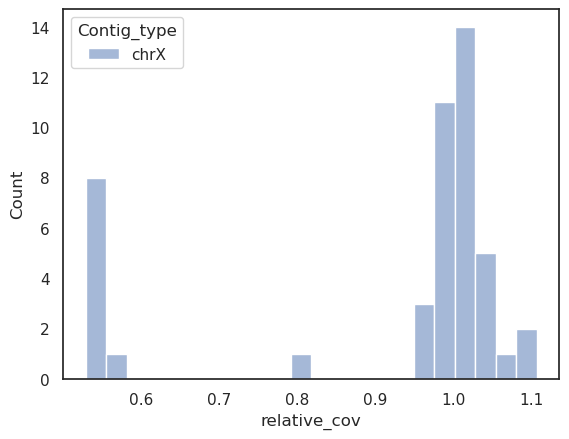

In [129]:
sns.histplot(df_cov.loc[df_cov.Contig_type == "chrX"], x="relative_cov", hue="Contig_type")

In [23]:
#Only using 3 chroms for aut for computational speed
ds_aut = ds.isel(contigs=[13, 14, 15]) #ds.isel(contigs=(slice(0, 23)))
np.unique(ds_aut.contigs.values)

array([0, 1, 2])

In [24]:
ds_aut.contig_length.values

array([1.32018348e+08, 1.31692671e+08, 1.07915467e+08])